# Analyzing the performances 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import os 
import numpy as np

#inputs for evaluation
path_test='/home/basile/Documents/projet_bees_detection_basile/bees_detection/src/data/inputs/test.csv'
path_train='/home/basile/Documents/projet_bees_detection_basile/bees_detection/src/data/inputs/train.csv'

df_test=pd.read_csv(path_test,header=None)
df_train=pd.read_csv(path_train,header=None)

#outputs from evaluation
path_evaluation_test='/home/basile/Documents/projet_bees_detection_basile/bees_detection/src/data/outputs/evaluation_on_test_on_2023-03-23-12:55:54.csv'
path_evaluation_train='/home/basile/Documents/projet_bees_detection_basile/bees_detection/src/data/outputs/evaluation_on_train_on_2023-03-23-16:22:39.csv'

df_evaluation_test=pd.read_csv(path_evaluation_test)
df_evaluation_train=pd.read_csv(path_evaluation_train)

# keep only the last row 'all species'
df_evaluation_test_global=df_evaluation_test.iloc[-1,:]
df_evaluation_train_global=df_evaluation_train.iloc[-1,:]

# output by species
df_evaluation_test=df_evaluation_test.iloc[:-1,:]#.sort_values(by='label')
df_evaluation_train=df_evaluation_train.iloc[:-1,:]#.sort_values(by='label')



In [2]:
df_evaluation_train
df_evaluation_test

,label,class_p_global,class_r_global,class_f1_global,bbox_p_global,bbox_r_global,bbox_f1_global,ious_global,intersections_global
0,Bombuspascuorum,0.925,0.984,0.954,0.761,0.810,0.785,0.684,0.825
1,Melectaalbifrons,0.812,1.000,0.897,0.688,0.846,0.759,0.609,0.854
2,Andrenahattorfiana,0.817,0.907,0.860,0.417,0.463,0.439,0.611,0.810
3,Xylocopavalga,0.947,1.000,0.973,0.579,0.611,0.595,0.634,0.872
4,Anthidiumflorentinum,0.821,0.932,0.873,0.524,0.595,0.557,0.636,0.812
...,...,...,...,...,...,...,...,...,...
65,Bombusbohemicus,0.909,0.909,0.909,0.545,0.545,0.545,0.621,0.901
66,Osmiaaurulenta,1.000,0.900,0.947,0.556,0.500,0.526,0.647,0.885
67,Halictussexcinctus,0.818,0.900,0.857,0.273,0.300,0.286,0.681,0.843
68,Hylaeusvariegatus,1.000,1.000,1.000,0.875,0.875,0.875,0.682,0.851


In [3]:
df_evaluation_train

,label,class_p_global,class_r_global,class_f1_global,bbox_p_global,bbox_r_global,bbox_f1_global,ious_global,intersections_global
0,Bombussylvarum,0.898,0.960,0.928,0.675,0.722,0.698,0.647,0.822
1,Ceratinacucurbitina,0.931,0.928,0.930,0.582,0.581,0.581,0.634,0.867
2,Amegillaquadrifasciata,0.853,0.853,0.853,0.440,0.440,0.440,0.641,0.823
3,Andrenavaga,0.912,0.954,0.932,0.644,0.673,0.658,0.629,0.838
4,Osmiabicolor,0.844,0.964,0.900,0.492,0.562,0.525,0.625,0.851
...,...,...,...,...,...,...,...,...,...
65,Andrenacineraria,0.929,0.969,0.949,0.688,0.718,0.703,0.657,0.830
66,Bombushumilis,0.876,0.956,0.914,0.503,0.548,0.525,0.639,0.861
67,Anthidiumoblongatum,0.915,0.921,0.918,0.560,0.564,0.562,0.632,0.800
68,Halictussexcinctus,0.879,0.897,0.888,0.616,0.629,0.622,0.647,0.783


# Inputs

Is every specie evenly distributed ?

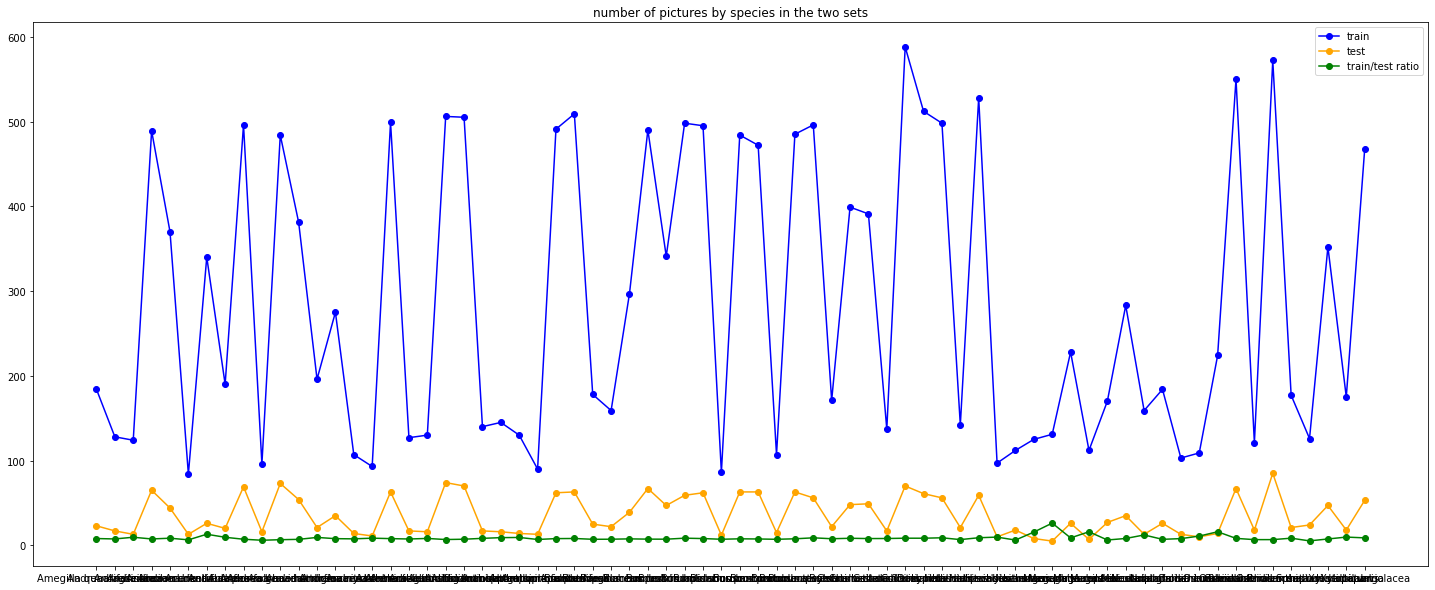

In [4]:
labels = df_evaluation_test['label'].unique()

# number of pictures by species

df_test_nb=df_test[0].str.split(os.path.sep,expand=True).iloc[:,1].value_counts()
df_train_nb=df_train[0].str.split(os.path.sep,expand=True).iloc[:,1].value_counts()

# ratio of pictures by species in the two sets
df_test_nb=df_test_nb.sort_index()
df_train_nb=df_train_nb.sort_index()
df_train_test_ratio=df_train_nb/df_test_nb


# number of pictures by species in the two sets

plt.figure(figsize=(25,10))

plt.plot(df_train_nb.index,df_train_nb.values,'o-',label='train',color='blue')
plt.plot(df_test_nb.index,df_test_nb.values,'o-',label='test',color='orange')
plt.plot(df_train_test_ratio.index,df_train_test_ratio.values,'o-',label='train/test ratio',color='green')
plt.legend()
plt.title('number of pictures by species in the two sets')
plt.show()



The ratio curve is flat, the split is good.
What about augmenting the data across the species ? 

# Global performances

How does the model perfom ?

In [5]:
train_metrics=df_evaluation_train.iloc[-1,:]
test_metrics=df_evaluation_test.iloc[-1,:]   


print('Train metrics')
print(train_metrics)
print('Test metrics')
print(test_metrics)



Train metrics
label                   Nomadalathburiana
class_p_global                      0.939
class_r_global                      0.903
class_f1_global                     0.921
bbox_p_global                       0.697
bbox_r_global                        0.67
bbox_f1_global                      0.683
ious_global                         0.656
intersections_global                0.755
Name: 69, dtype: object
Test metrics
label                   Anthophorafurcata
class_p_global                      0.812
class_r_global                        1.0
class_f1_global                     0.897
bbox_p_global                       0.562
bbox_r_global                       0.692
bbox_f1_global                      0.621
ious_global                         0.627
intersections_global                0.856
Name: 69, dtype: object


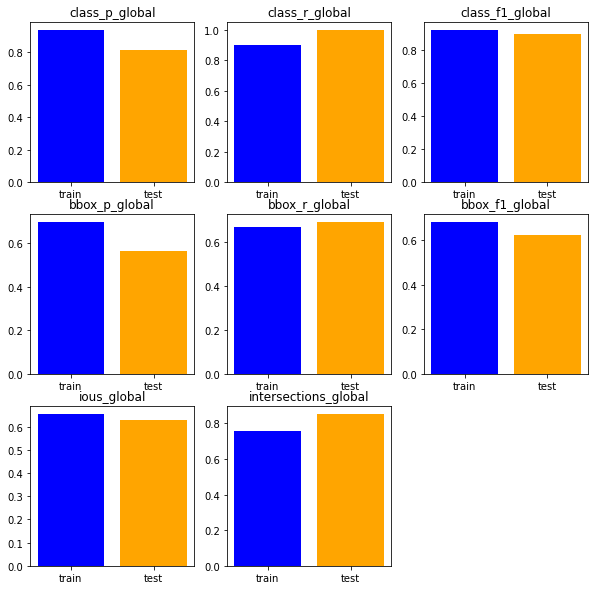

In [6]:
# plot the metrics

plt.figure(figsize=(10,10))

for i, metric in enumerate(train_metrics[1:]):
    i=i+1
    plt.subplot(3,3,i)
    plt.bar(['train','test'],[train_metrics[i],test_metrics[i]],color=['blue','orange'])
    plt.title(train_metrics.index[i])




Performs pretty well, in particular no obvious sign of overfitting (globally metric_train=metric_test)

- class_p_global : 

# Performances for every species


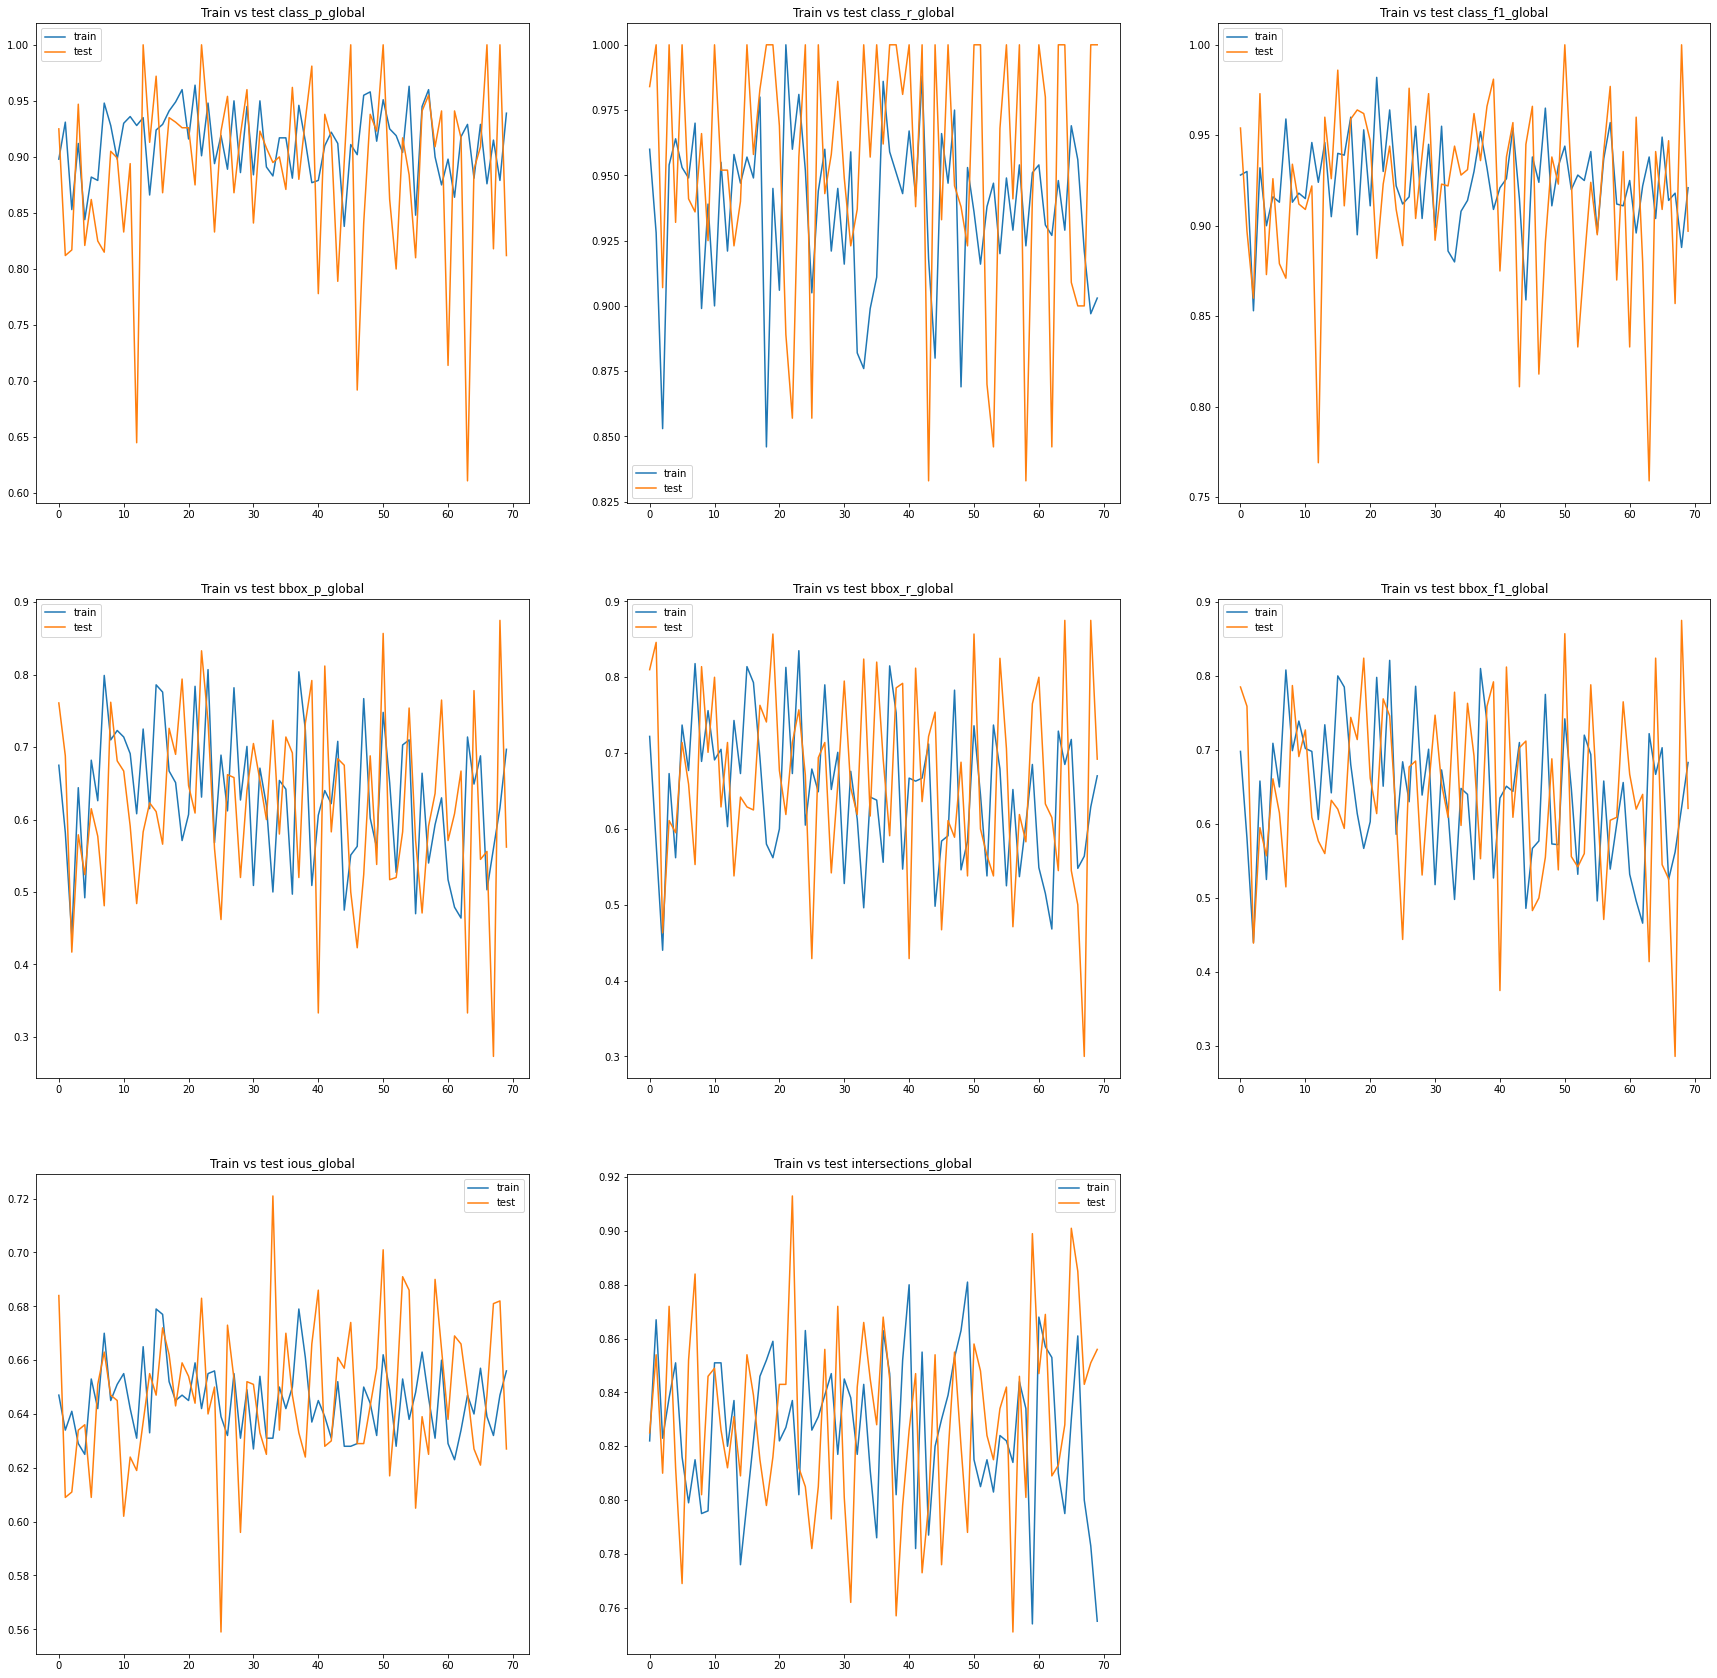

In [7]:

# plot the metrics to see the disparity between species

plt.figure(figsize=(30,30))

for i, metric in enumerate(train_metrics[1:]):
    i=i+1
    plt.subplot(3,3,i)
    plt.plot(df_evaluation_train[train_metrics.index[i]],label='train')
    plt.plot(df_evaluation_test[train_metrics.index[i]],label='test')
    plt.title('Train vs test {}'.format(train_metrics.index[i]))
    plt.legend()



Is this a problem of representation ?

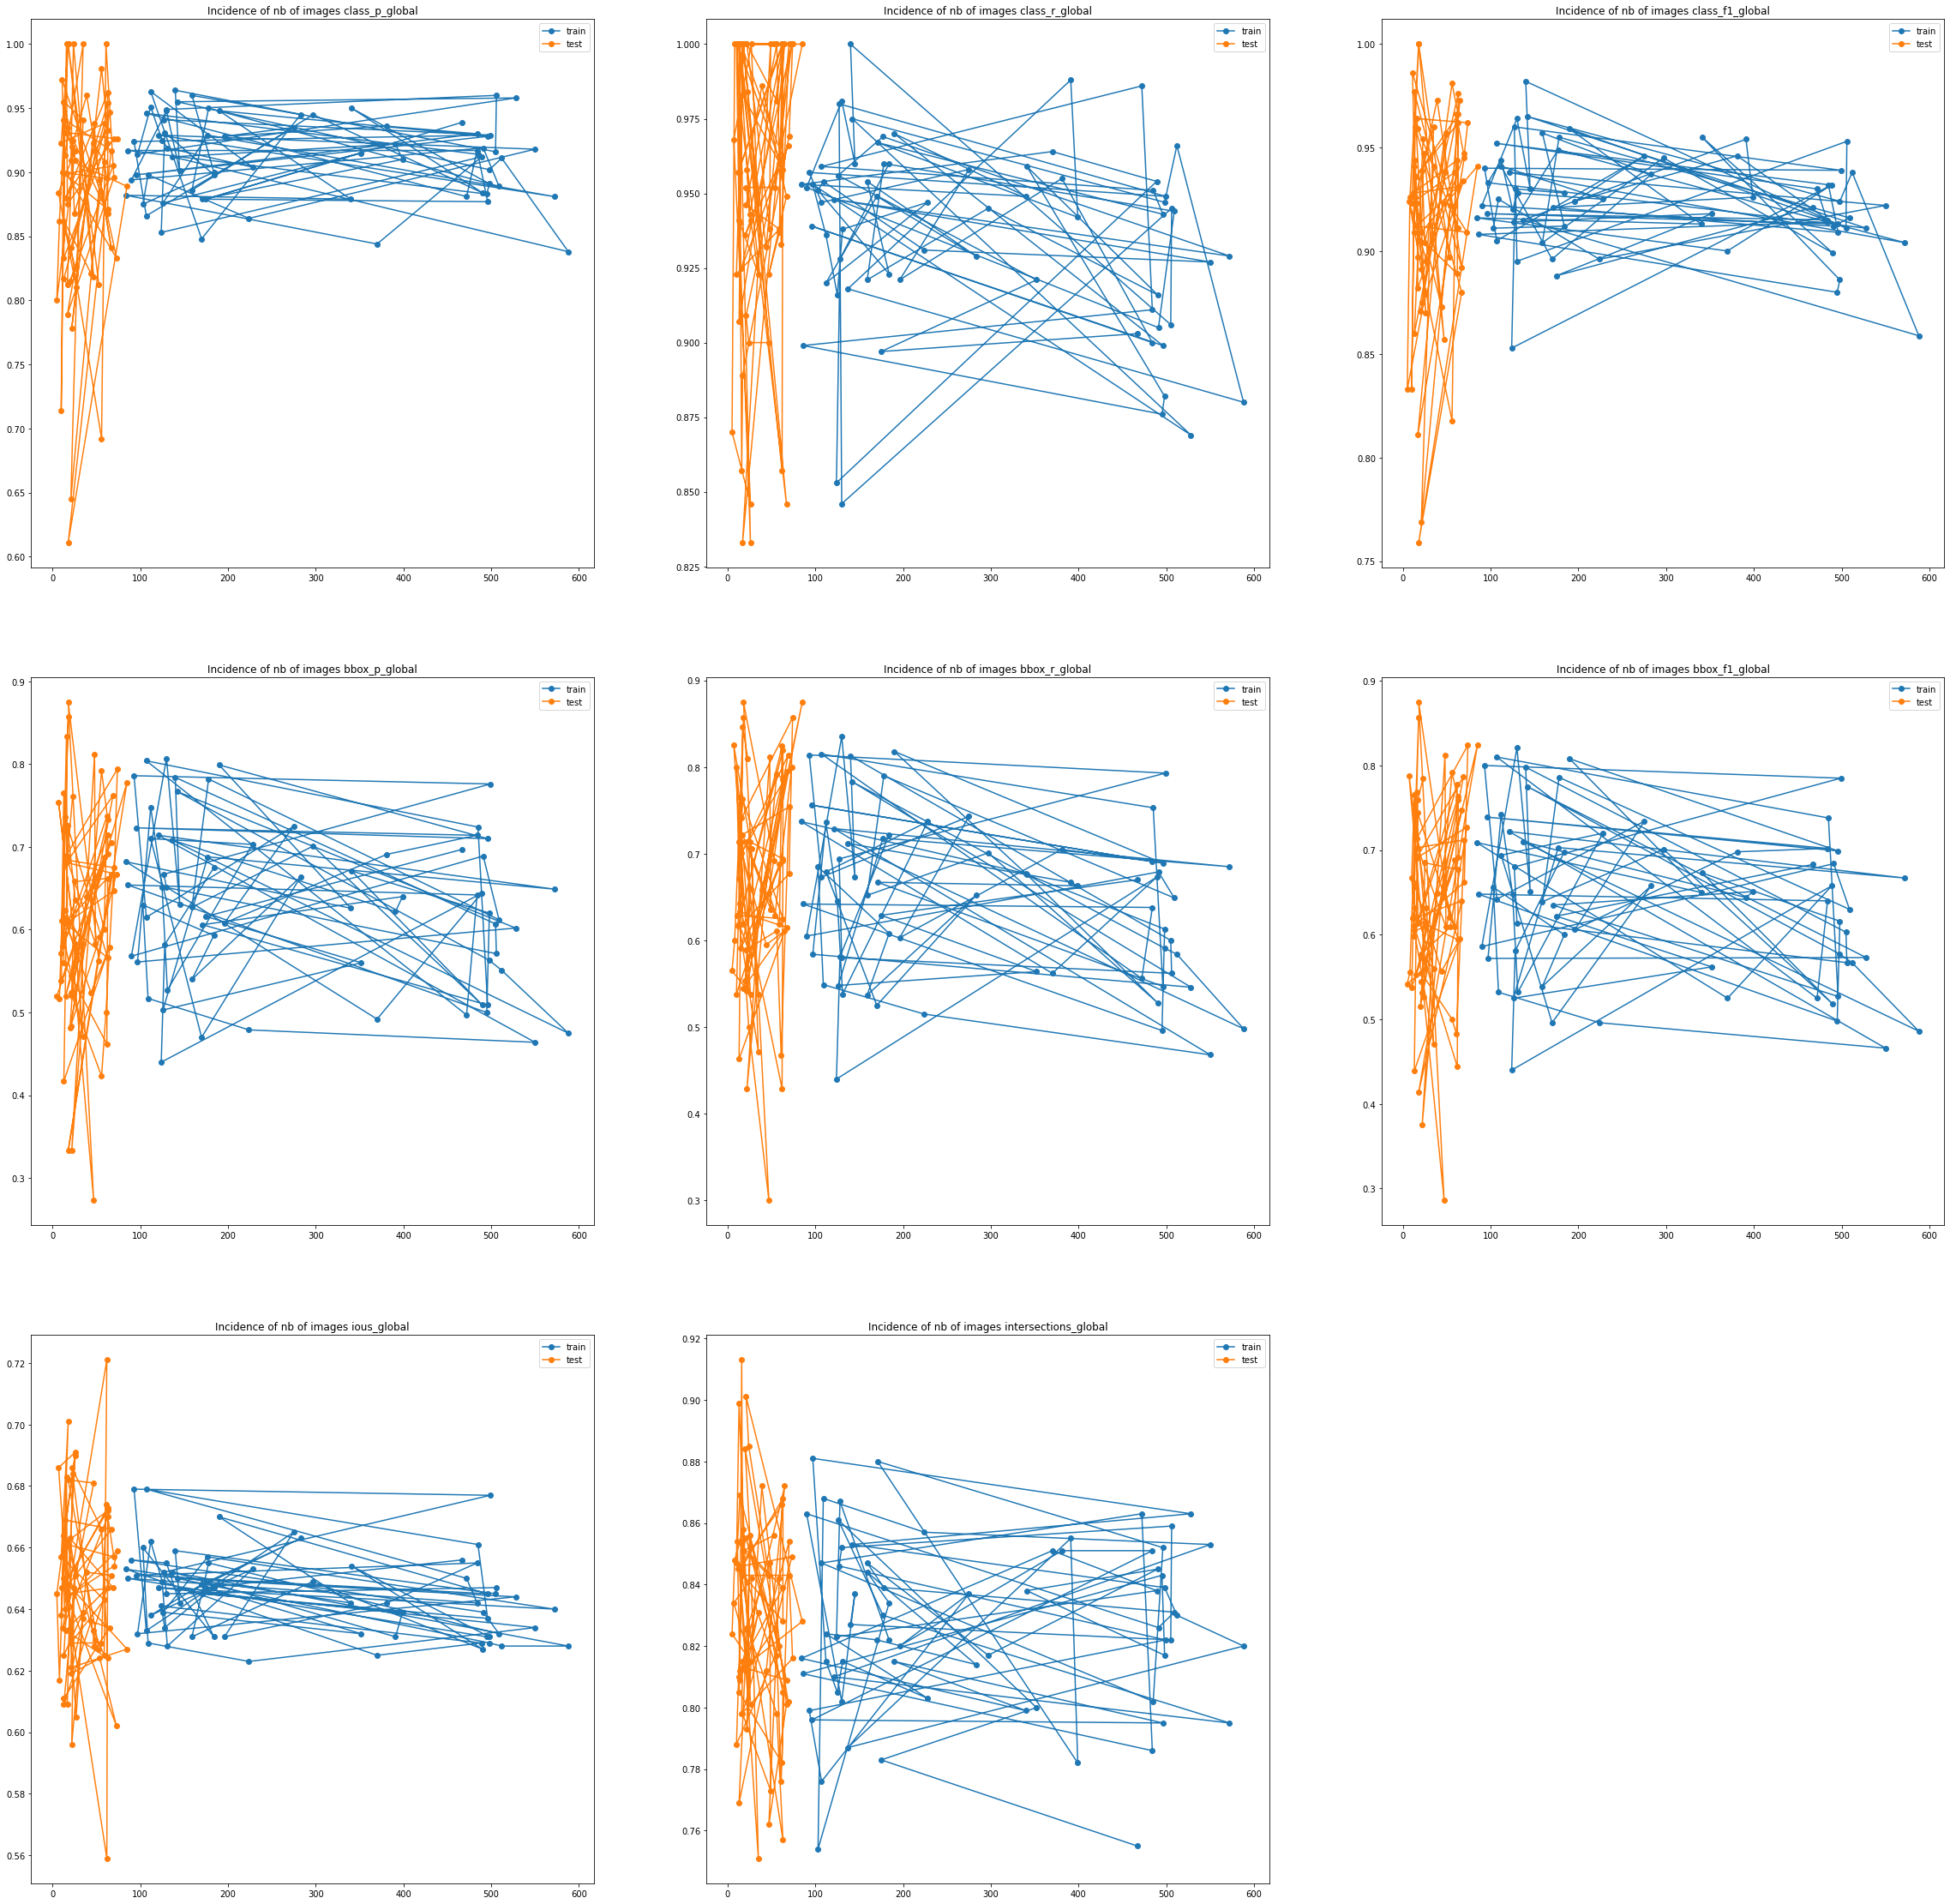

In [8]:

plt.figure(figsize=(40,40))

for i, metric in enumerate(train_metrics[1:]):
    i=i+1
    plt.subplot(3,3,i)
    plt.plot(df_train_nb,df_evaluation_train[train_metrics.index[i]],'o-',label='train')
    plt.plot(df_test_nb,df_evaluation_test[train_metrics.index[i]],'o-',label='test')
    plt.title('Incidence of nb of images {}'.format(train_metrics.index[i]))
    plt.legend()


In [9]:
np.corrcoef(df_train_nb,df_evaluation_train[train_metrics.index[1]])[0,1]

-0.10326208332075996

devrait être positive ??